In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#target_default  ==> {0, 1} za predikciju...

data = pd.read_csv("/content/acquisition_train.csv")
data

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,696cb747-1159-0a29-6731-8c52c6c42f5d

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ids                                               45000 non-null  object 
 1   target_default                                    41741 non-null  object 
 2   score_1                                           44438 non-null  object 
 3   score_2                                           44438 non-null  object 
 4   score_3                                           44438 non-null  float64
 5   score_4                                           45000 non-null  float64
 6   score_5                                           45000 non-null  float64
 7   score_6                                           45000 non-null  float64
 8   risk_rate                                         44438 non-null  float64
 9   last_amount_borro

In [ ]:
data.dropna(subset=["target_default"], inplace = True )

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41741 entries, 0 to 44999
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ids                                               41741 non-null  object 
 1   target_default                                    41741 non-null  object 
 2   score_1                                           41741 non-null  object 
 3   score_2                                           41741 non-null  object 
 4   score_3                                           41741 non-null  float64
 5   score_4                                           41741 non-null  float64
 6   score_5                                           41741 non-null  float64
 7   score_6                                           41741 non-null  float64
 8   risk_rate                                         41741 non-null  float64
 9   last_amount_borro

In [ ]:
data.drop(columns = ["target_fraud"], axis = 1, inplace = True )


In [ ]:
data.info()
#The features channel and external_data_provider_credit_checks_last_2_year have only one value. 
# As that won't be useful for the model, we can drop these two columns. ==> nunique
data.nunique().sort_values(ascending = True)[0:2] 

data.drop(columns = ["external_data_provider_credit_checks_last_2_year", "channel"], axis = 1, inplace = True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41741 entries, 0 to 44999
Data columns (total 42 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ids                                               41741 non-null  object 
 1   target_default                                    41741 non-null  object 
 2   score_1                                           41741 non-null  object 
 3   score_2                                           41741 non-null  object 
 4   score_3                                           41741 non-null  float64
 5   score_4                                           41741 non-null  float64
 6   score_5                                           41741 non-null  float64
 7   score_6                                           41741 non-null  float64
 8   risk_rate                                         41741 non-null  float64
 9   last_amount_borro

In [ ]:
data.info()
# remove some other columns that are not adding value to the model
data.drop(labels=['email', 'reason', 'zip', 'job_name', 'external_data_provider_first_name', 'lat_lon',
                       'shipping_zip_code', 'user_agent', 'profile_tags', 'marketing_channel',
                       'profile_phone_number', 'application_time_applied', 'ids'], axis=1, inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41741 entries, 0 to 44999
Data columns (total 40 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   ids                                              41741 non-null  object 
 1   target_default                                   41741 non-null  object 
 2   score_1                                          41741 non-null  object 
 3   score_2                                          41741 non-null  object 
 4   score_3                                          41741 non-null  float64
 5   score_4                                          41741 non-null  float64
 6   score_5                                          41741 non-null  float64
 7   score_6                                          41741 non-null  float64
 8   risk_rate                                        41741 non-null  float64
 9   last_amount_borrowed        

In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41741 entries, 0 to 44999
Data columns (total 27 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   target_default                                   41741 non-null  object 
 1   score_1                                          41741 non-null  object 
 2   score_2                                          41741 non-null  object 
 3   score_3                                          41741 non-null  float64
 4   score_4                                          41741 non-null  float64
 5   score_5                                          41741 non-null  float64
 6   score_6                                          41741 non-null  float64
 7   risk_rate                                        41741 non-null  float64
 8   last_amount_borrowed                             14133 non-null  float64
 9   last_borrowed_in_months     

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
count,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000,14133.000000,14133.000000,28632.000000,4.174100e+04,17276.000000,41606.000000,41729.000000,41741.000000,30818.000000,41741.000000,41741.000000,27720.000000,39656.000000,41741.000000,41741.0
mean,346.459836,100.006820,0.499416,99.919399,0.294451,13328.104095,40.588410,33877.220453,7.108012e+04,35.192174,0.076696,0.004625,10.639108,11.023882,247.748545,1.504396,0.504185,12.731188,500.491771,inf
std,110.102271,3.183821,0.288085,10.022703,0.101561,7918.698433,9.437936,36141.985884,5.225978e+04,21.629577,0.274820,0.080157,4.588175,4.596036,146.326172,1.114207,0.499992,125.711218,287.993121,NaN
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,0.000000,403.0
25%,270.000000,97.862546,0.251595,93.182517,0.220000,7210.280000,36.000000,9975.000000,4.401958e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,1.000000,0.000000,11.000000,252.000000,50910.0
50%,340.000000,100.017950,0.500174,99.977774,0.290000,12011.050000,36.000000,25213.000000,6.004409e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,2.000000,1.000000,27.000000,502.000000,101623.0
75%,420.000000,102.143100,0.747630,106.630991,0.360000,18030.160000,36.000000,46492.500000,8.503289e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,2.000000,1.000000,43.000000,747.000000,151248.0
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,3.000000,1.000000,59.000000,1000.000000,inf


In [ ]:
data[data["external_data_provider_email_seen_before"] == -999 ] # replace -999 ==> nan 
data[["external_data_provider_email_seen_before"]] = data[["external_data_provider_email_seen_before"]].replace(-999, np.nan)


In [ ]:
data.describe()
np.isinf(data[["reported_income"]]).sum()

reported_income    66
dtype: int64

In [ ]:
# data frame containing numerical features
df_credit_numerical = data[['score_3', 'risk_rate', 'last_amount_borrowed', 
                                 'last_borrowed_in_months', 'credit_limit', 'income', 'ok_since', 
                                 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues', 
                                 'external_data_provider_email_seen_before']] 

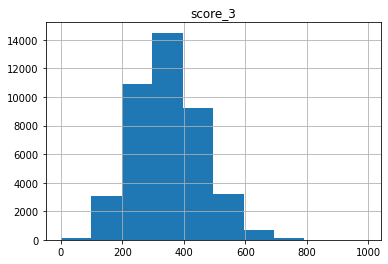

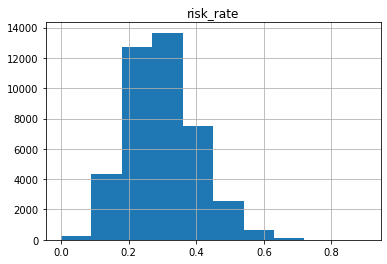

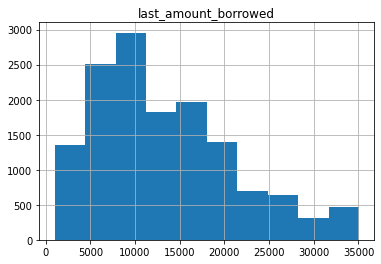

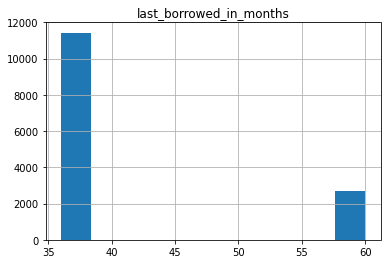

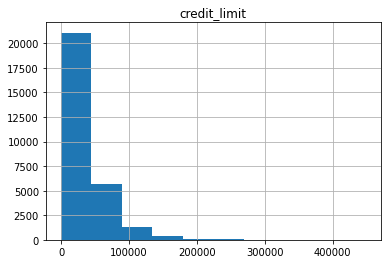

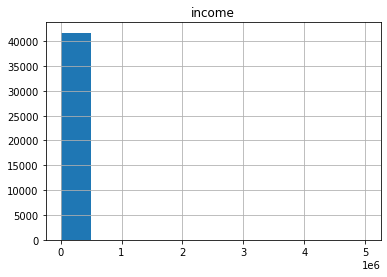

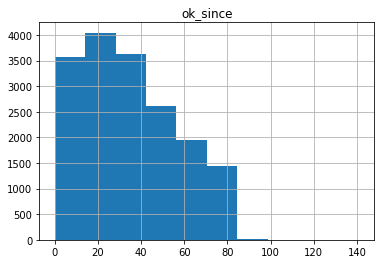

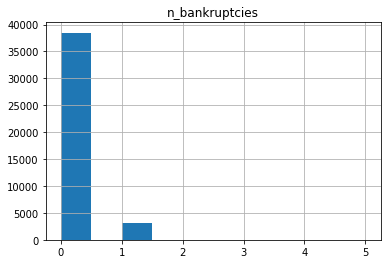

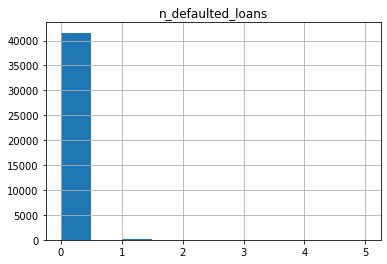

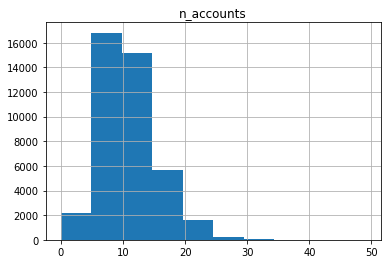

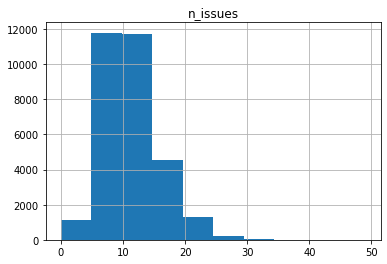

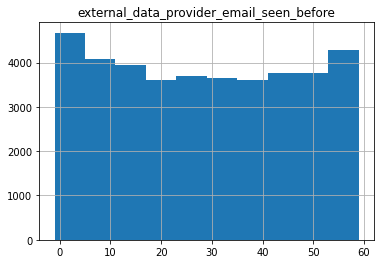

In [ ]:
for i in range(df_credit_numerical.shape[1]):
  df_credit_numerical.iloc[:, [i]].hist()# score3 ==> Normal dist; last_borrowed_in_months, n_bankruptcies (check)

#
#All these features above have missing values that need to be treated ==> they have skewed distribution ==> missing vals can be treated 
# 
# fill missing values for "last_amount_borrowed", "last_borrowed_in_months" and "n_issues"
data['last_amount_borrowed'].fillna(value=0, inplace=True)
data['last_borrowed_in_months'].fillna(value=0, inplace=True)
data['n_issues'].fillna(value=0, inplace=True)

In [ ]:
# fill missing values for numerical variables ==> SimpleImputer ==> median vals 
data.info()
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

data_nums = data.select_dtypes(include=numerics)
cols_nums = list(data_nums.columns)

df_credit_num = data.select_dtypes(exclude='object').columns
from sklearn.impute import SimpleImputer
data.fillna(data.median(), inplace=True)

# fill missing values for numerical variables
#imputer = SimpleImputer(missing_values='NaN', strategy='median')
#imputer = imputer.fit(data.loc[:, df_credit_num])
#df_credit.loc[:, df_credit_num] = imputer.transform(df_credit.loc[:, df_credit_num])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41741 entries, 0 to 44999
Data columns (total 27 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   target_default                                   41741 non-null  object 
 1   score_1                                          41741 non-null  object 
 2   score_2                                          41741 non-null  object 
 3   score_3                                          41741 non-null  float64
 4   score_4                                          41741 non-null  float64
 5   score_5                                          41741 non-null  float64
 6   score_6                                          41741 non-null  float64
 7   risk_rate                                        41741 non-null  float64
 8   last_amount_borrowed                             41741 non-null  float64
 9   last_borrowed_in_months     

In [ ]:
data.info()
df_credit_categ= data.select_dtypes(include='object').columns
print(df_credit_categ)
X = data[ df_credit_categ ]
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(data[ df_credit_categ ])
data[ df_credit_categ ] = imputer.transform( data[ df_credit_categ ] )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41741 entries, 0 to 44999
Data columns (total 27 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   target_default                                   41741 non-null  bool   
 1   score_1                                          41741 non-null  object 
 2   score_2                                          41741 non-null  object 
 3   score_3                                          41741 non-null  float64
 4   score_4                                          41741 non-null  float64
 5   score_5                                          41741 non-null  float64
 6   score_6                                          41741 non-null  float64
 7   risk_rate                                        41741 non-null  float64
 8   last_amount_borrowed                             41741 non-null  float64
 9   last_borrowed_in_months     

In [ ]:
data.info()
# cleaning data finished:
# categorical features into numerical values. LabelEncoder 

from sklearn.preprocessing import LabelEncoder

### name of categorical columns:
categ_cols = data.select_dtypes(include="object").columns
categ_cols = list(categ_cols)

le = LabelEncoder()

data[ categ_cols ] = data[ categ_cols ].apply(le.fit_transform)

#XGBoost
#LightGBM
#CatBoost

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41741 entries, 0 to 44999
Data columns (total 27 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   target_default                                   41741 non-null  bool   
 1   score_1                                          41741 non-null  object 
 2   score_2                                          41741 non-null  object 
 3   score_3                                          41741 non-null  float64
 4   score_4                                          41741 non-null  float64
 5   score_5                                          41741 non-null  float64
 6   score_6                                          41741 non-null  float64
 7   risk_rate                                        41741 non-null  float64
 8   last_amount_borrowed                             41741 non-null  float64
 9   last_borrowed_in_months     

In [ ]:
data # mozda StandardScaler?  # dataset.fillna(dataset.mean(), inplace=True)
# XGBoost

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,facebook_profile,state,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_state
0,False,0,10,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,65014.12,1,44,1,32.0,0.0,0.0,18.0,18.0,444,2,0.0,51.0,645,57849.0,12
1,False,3,16,370.0,97.062615,0.942655,92.002546,0.24,0.00,0.0,39726.0,100018.91,0,47,1,50.0,0.0,0.0,14.0,14.0,346,1,0.0,17.0,243,4902.0,20
2,True,3,9,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,25213.0,65023.65,0,32,3,32.0,0.0,0.0,10.0,0.0,6,2,1.0,9.0,65,163679.0,19
3,False,0,21,510.0,101.599485,0.987673,94.902491,0.32,0.00,0.0,54591.0,68830.01,0,23,3,32.0,1.0,0.0,19.0,19.0,406,3,1.0,38.0,815,1086.0,17
4,False,2,1,500.0,98.474289,0.532539,118.126207,0.18,0.00,0.0,25213.0,60011.29,1,47,3,32.0,0.0,0.0,11.0,0.0,240,2,1.0,46.0,320,198618.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,False,3,16,280.0,96.379531,0.416693,103.667082,0.17,14766.42,36.0,10627.0,100013.24,0,46,1,37.0,0.0,0.0,7.0,7.0,72,2,1.0,7.0,730,73417.0,8
44996,False,6,31,370.0,96.124977,0.692196,97.977973,0.27,0.00,0.0,36262.0,95026.69,0,36,1,32.0,0.0,0.0,16.0,16.0,51,1,1.0,1.0,28,26246.0,18
44997,False,4,24,280.0,102.377780,0.530938,93.687747,0.30,0.00,0.0,0.0,106020.90,0,47,4,7.0,0.0,0.0,6.0,6.0,476,2,1.0,27.0,940,101252.0,23
44998,True,6,5,240.0,100.476090,0.214697,86.759074,0.37,0.00,0.0,0.0,185018.07,1,47,1,53.0,0.0,0.0,10.0,10.0,35,0,1.0,2.0,459,129844.0,23


In [ ]:
## draw models: 
from xgboost import XGBClassifier
xgb = XGBClassifier()

X = data.drop(columns = ["target_default"], axis = 1)
Y = data[["target_default"]]

In [ ]:
from sklearn.model_selection import train_test_split
X[["reported_income"]] = X[["reported_income"]].replace( float('inf'), X["reported_income"].median() )

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 2, test_size = 0.2)


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# numericke vrijednosti iz X 
num_cols = X.select_dtypes(exclude="object").columns 
num_cols = list(num_cols) 
#X_train[["reported_income"]].sort_values(by = ["reported_income"], ascending = False)
sc.fit(X_train[ num_cols ])
X_train = sc.transform(X_train[ num_cols ])
print(X_train)

[[ 0.73335522 -1.22952507  2.29558146 ... -1.01036735 -0.04024644
  -0.69541419]
 [-1.28390526 -0.79115165  0.03080294 ... -0.68024209 -0.04024644
  -1.32614932]
 [-1.28390526 -0.68155829  0.30257636 ...  1.69665979 -0.04024644
  -1.32614932]
 ...
 [-0.6114851  -1.11993171  1.57085233 ... -0.08601662 -0.04024644
  -0.31697311]
 [-0.6114851   1.40071546 -0.42215276 ... -1.33701761 -0.04024644
  -0.06467906]
 [-0.6114851  -0.02399816  1.02730549 ...  0.0668835  -0.04024644
   0.69220309]]


In [ ]:
xgb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:

X_test1 = sc.transform(X_test) 
print(X_test1)
print(X_train.shape, " ", X_test1.shape)
y_pred = xgb.predict_proba (X_test1)
print("Score of XGB Classifier: ", xgb.score(X_test1, y_test))# 0.8 score


[[ 0.73335522 -0.24318487 -0.24097048 ... -1.30921759 -0.04024644
   1.32293822]
 [-1.28390526  0.41437526 -0.15037934 ... -1.36134263 -0.04024644
  -0.82156122]
 [ 0.73335522 -0.24318487 -0.60333504 ... -1.53509277 -0.04024644
   0.69220309]
 ...
 [ 1.40577538  0.74315532  0.21198522 ...  1.61673472 -0.04024644
  -0.31697311]
 [ 0.06093506  0.3047819   0.12139408 ...  1.0850593  -0.04024644
   0.94449715]
 [-0.6114851   1.07193539 -0.69392618 ... -1.22234252 -0.04024644
   1.32293822]]
(33392, 26)   (8349, 26)
Score of XGB Classifier:  0.8481255240148521


In [ ]:

# Tuning of parameters of XGBClassifier:
#After tuning some hyperparameters, all three models displayed betters results.
#It is worth mentioning that XGBoost presented a great score increase, while LightGBM and CatBoost saw a meager improvement.
# Test:
#LightGBM
#CatBoost
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
print("Score of LGBM: ", lgbm.score(X_test, y_test))#0.8472958642629904

cbc = CatBoostClassifier()
cbc.fit(X_train, y_train)
y_pred = cbc.predict(X_test)
y_pred = [ 1 if x == True else 0  for x in y_pred ]
confusion_matrix(y_test, y_pred, normalize='true')
print("CBC score: ", accuracy_score(y_test, y_pred))#0.8472958642629904

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score of LGBM:  0.607737453587256
Learning rate set to 0.046082
0:	learn: 0.6646050	total: 19ms	remaining: 19s
1:	learn: 0.6393277	total: 39.6ms	remaining: 19.7s
2:	learn: 0.6167739	total: 57.6ms	remaining: 19.1s
3:	learn: 0.5969734	total: 98.7ms	remaining: 24.6s
4:	learn: 0.5784394	total: 121ms	remaining: 24.1s
5:	learn: 0.5629393	total: 136ms	remaining: 22.6s
6:	learn: 0.5489731	total: 154ms	remaining: 21.8s
7:	learn: 0.5367058	total: 173ms	remaining: 21.4s
8:	learn: 0.5243896	total: 190ms	remaining: 20.9s
9:	learn: 0.5146431	total: 207ms	remaining: 20.5s
10:	learn: 0.5042616	total: 225ms	remaining: 20.2s
11:	learn: 0.4961479	total: 247ms	remaining: 20.3s
12:	learn: 0.4888779	total: 268ms	remaining: 20.3s
13:	learn: 0.4811992	total: 285ms	remaining: 20.1s
14:	learn: 0.4746994	total: 307ms	remaining: 20.2s
15:	learn: 0.4681748	total: 336ms	remaining: 20.7s
16:	learn: 0.4626026	total: 356ms	remaining: 20.6s
17:	learn: 0.4576294	total: 374ms	remaining: 20.4s
18:	learn: 0.4530162	total: 

In [ ]:
from sklearn.model_selection import GridSearchCV

cb = CatBoostClassifier()
y_train["target_default"] = y_train["target_default"].apply( lambda  x: 1 if x == True else 0 )
#y_train1 = [1 if x == True else 0 for x in y_train]
#y_train1 = np.reshape(y_train, (1, len(y_train1) ))
print(y_train.shape, " ", X_train.shape)
# parameter to be searched
param_grid = {'depth': [6, 8, 10],
              'learning_rate': [0.03, 0.1],
              'l2_leaf_reg': [1, 5, 10],
             }

# find the best parameter            
#kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(cb, param_grid, scoring="recall", n_jobs=-1) #, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

(33392, 1)   (33392, 26)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0:	learn: 0.6334238	total: 20.7ms	remaining: 20.7s
1:	learn: 0.5872552	total: 37.8ms	remaining: 18.9s
2:	learn: 0.5513012	total: 55.5ms	remaining: 18.4s
3:	learn: 0.5233771	total: 72.5ms	remaining: 18.1s
4:	learn: 0.5020828	total: 89.8ms	remaining: 17.9s
5:	learn: 0.4852490	total: 104ms	remaining: 17.2s
6:	learn: 0.4691743	total: 121ms	remaining: 17.2s
7:	learn: 0.4579265	total: 140ms	remaining: 17.3s
8:	learn: 0.4491519	total: 157ms	remaining: 17.3s
9:	learn: 0.4415539	total: 174ms	remaining: 17.3s
10:	learn: 0.4354429	total: 194ms	remaining: 17.5s
11:	learn: 0.4301940	total: 212ms	remaining: 17.4s
12:	learn: 0.4265763	total: 236ms	remaining: 17.9s
13:	learn: 0.4235673	total: 254ms	remaining: 17.9s
14:	learn: 0.4205433	total: 272ms	remaining: 17.9s
15:	learn: 0.4178777	total: 291ms	remaining: 17.9s
16:	learn: 0.4158217	total: 309ms	remaining: 17.9s
17:	learn: 0.4131356	total: 327ms	remaining: 17.9s
18:	learn: 0.4118390	total: 345ms	remaining: 17.8s
19:	learn: 0.4106024	total: 363ms	re

In [ ]:
ar =  {'depth': 6, 'l2_leaf_reg': 5, 'learning_rate': 0.1}
cb = CatBoostClassifier(**ar)
cb.fit(X_train, y_train)

y_pred = cb.predict(X_test) 

from sklearn.metrics import classification_report

0:	learn: 0.6334937	total: 19.1ms	remaining: 19.1s
1:	learn: 0.5873482	total: 38.5ms	remaining: 19.2s
2:	learn: 0.5513963	total: 59ms	remaining: 19.6s
3:	learn: 0.5234895	total: 77ms	remaining: 19.2s
4:	learn: 0.5022128	total: 95.5ms	remaining: 19s
5:	learn: 0.4853705	total: 110ms	remaining: 18.2s
6:	learn: 0.4724160	total: 128ms	remaining: 18.2s
7:	learn: 0.4606048	total: 147ms	remaining: 18.2s
8:	learn: 0.4521608	total: 169ms	remaining: 18.6s
9:	learn: 0.4440148	total: 189ms	remaining: 18.7s
10:	learn: 0.4374301	total: 208ms	remaining: 18.7s
11:	learn: 0.4331163	total: 228ms	remaining: 18.8s
12:	learn: 0.4289949	total: 248ms	remaining: 18.8s
13:	learn: 0.4240596	total: 265ms	remaining: 18.7s
14:	learn: 0.4207705	total: 283ms	remaining: 18.6s
15:	learn: 0.4172159	total: 301ms	remaining: 18.5s
16:	learn: 0.4146422	total: 319ms	remaining: 18.5s
17:	learn: 0.4126766	total: 337ms	remaining: 18.4s
18:	learn: 0.4111577	total: 356ms	remaining: 18.4s
19:	learn: 0.4098758	total: 387ms	remainin

In [ ]:
#!pip install lightgbm
#!pip install catboost

In [ ]:
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print(accuracy_score(y_test, y_pred)) ## 0.8430949814349024

In [ ]:
### LogisticRegression 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV

#### tune ####
lr = LogisticRegression()
grid = {
    "penalty"  : [ 'l1', 'l2', 'elasticnet'], 
    "tol"      : [ 0.0001, 0.01, 0.1 ],
     "C"       : [1.0, 2.0, 5.0],
     "max_iter": [ 100, 500, 1000 ]
}

gs = GridSearchCV(lr, grid )
gs.fit(X_train, y_train)
#### tuned LogisticRegression ######
bp = gs.best_params_
lrs = LogisticRegression(**bp)
lr.fit(X_train, y_train) 
print("Score of Logistic Regression: ", lr.score(X_test, y_test)) #0.8428554317882381

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

Score of Logistic Regression:  0.8428554317882381


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
## RNN za credit risk (keras):
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Input, AveragePooling1D, MaxPooling1D, Dropout, MaxPool1D

X_train.shape # (26, )

model = Sequential()
model.add(Dense(32, activation="relu", input_shape=(26, ) ) )
#model.add(MaxPool1D( pool_size = 3))
model.add(Dropout(0.3))
model.add(Dense(32, activation="tanh"))
#model.add(Dropout(0.3))
model.add(Dense(1 , activation = "sigmoid"))

model.summary()
##### set up the network #### 
model.compile( optimizer="adam", loss="binary_crossentropy", metrics = [ "accuracy" ] )
##### fit network (run): ######
model.fit(X_train, y_train, batch_size=16, epochs=200, validation_data=(X_test, y_test))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                864       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,953
Trainable params: 1,953
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
2087/2087 [==============================] - 4s 2ms/step - loss: 0.4321 - accuracy: 0.8380 - val_loss: 0.4660 - val_accuracy: 0.8448
Epoch 2/200
2087/2087 [==============================] - 4s 2ms/step - loss: 0.4212 - accuracy: 0.8392 - va

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
y_pred = [ 1 if x > 0.5 else 0 for x in y_pred]

print("acc. score: ", accuracy_score(y_pred, y_test)) # 0.8447718289615522

trueVal = y_train[y_train["target_default"] == True].shape[ 0 ] # (24 000, 5 000 True)
y_train = y_train.reset_index
y_train

acc. score:  0.8447718289615522


<bound method DataFrame.reset_index of        target_default
33069               0
27593               0
22272               0
32655               0
43213               0
...               ...
33443               0
32639               0
7143                0
38106               0
25542               0

[33392 rows x 1 columns]>

In [ ]:
### separate dataset ==> equal number of 0s and 1s (resampling the staritng data): 
data_1 = data[data["target_default"] ==  True ]
data_0 = data[data["target_default"] ==  False ]

#### sample ==> random sampling
data_0_sample = data_0.sample(n = data_1.shape[ 0 ] )

print(data_1.shape)
print(data_0_sample)

data_union = pd.concat([ data_1, data_0_sample ], axis = 0)

#### train-test-split 
dataX = data.drop(columns = ["target_default"], axis = 0)
dataY = data[["target_default"]]

dataX[["reported_income"]] = dataX[["reported_income"]].replace( float('inf'), X["reported_income"].median() )

Xx_train, Xx_test, yy_train, yy_test = train_test_split(dataX, dataY, random_state = 2, test_size = 0.3) 

#### scale data Xx_train, Xx_test:

ssc = StandardScaler()
ssc.fit(Xx_train)
Xx_train_scaler = ssc.transform(Xx_train)
Xx_test_scaler = ssc.transform(Xx_test)


(6661, 27)
       target_default  score_1  ...  reported_income  shipping_state
10770           False        2  ...          15016.0              17
24328           False        0  ...         160730.0               2
11039           False        1  ...         112051.0              23
21022           False        1  ...          77247.0              19
20406           False        3  ...         158748.0              16
...               ...      ...  ...              ...             ...
3462            False        1  ...          12966.0              23
42289           False        2  ...         164862.0               7
1953            False        1  ...         184668.0               2
11336           False        2  ...         181377.0              23
6112            False        2  ...         113634.0               4

[6661 rows x 27 columns]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lreg = LogisticRegression()
lreg.fit(Xx_train_scaler, yy_train)
print("Scoring: ", lreg.score(Xx_test_scaler, yy_test))#0.8359053497942387
print("Scoring of LR: ", lreg.score(X_test, y_test))

print("yy_test size: ", yy_test.shape)
## cat boost: 
from catboost import CatBoostClassifier
cbc = CatBoostClassifier()
cbc.fit(Xx_train, yy_train)
y_pred = cbc.predict(Xx_test) 
y_pred = [1 if x == True else 0 for x in y_pred ]
yy_testT =   yy_test["target_default"]

print(yy_test)
print(y_pred)
print("Cat boost precision ", accuracy_score(y_pred, yy_testT))#0.8359053497942387


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Scoring:  0.8421304799169528
Scoring of LR:  0.8447718289615522
yy_test size:  (12523, 1)
Learning rate set to 0.043528
0:	learn: 0.6666356	total: 17.6ms	remaining: 17.6s
1:	learn: 0.6423897	total: 37.4ms	remaining: 18.6s
2:	learn: 0.6206513	total: 54ms	remaining: 17.9s
3:	learn: 0.6017623	total: 69.9ms	remaining: 17.4s
4:	learn: 0.5836717	total: 86.5ms	remaining: 17.2s
5:	learn: 0.5684460	total: 99.5ms	remaining: 16.5s
6:	learn: 0.5549308	total: 117ms	remaining: 16.6s
7:	learn: 0.5413341	total: 134ms	remaining: 16.6s
8:	learn: 0.5301513	total: 150ms	remaining: 16.5s
9:	learn: 0.5191892	total: 168ms	remaining: 16.6s
10:	learn: 0.5091480	total: 185ms	remaining: 16.6s
11:	learn: 0.5005745	total: 202ms	remaining: 16.6s
12:	learn: 0.4937938	total: 213ms	remaining: 16.2s
13:	learn: 0.4863402	total: 229ms	remaining: 16.2s
14:	learn: 0.4790789	total: 250ms	remaining: 16.4s
15:	learn: 0.4724808	total: 268ms	remaining: 16.5s
16:	learn: 0.4664507	total: 286ms	remaining: 16.5s
17:	learn: 0.461829

In [ ]:
### SVC ==> try out: 
from sklearn.svm import SVC

svc = SVC(kernel ="rbf", max_iter=20000, tol=1e-6, C=2)
svc.fit(Xx_train, yy_train)
print("SVC score: ", svc.score(Xx_test, yy_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC score:  0.8423700391280045


In [ ]:
### PSA ==> na data ==> pa vidjeti kako se ponasa predikcija redukcijom dimenzije
from sklearn.decomposition import PCA 
#dataX, dataY
pca = PCA(n_components = 20)
pca.fit(dataX)


PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
#print(pca.explained_variance_ratio_)
#print(pca.singular_values_)
dataX1 = pca.transform(dataX)
#dataX1.shape # reduced to  x 20 (dimension):

Xx_train_pca, Xx_test_pca, yy_train, yy_test = train_test_split(dataX1, dataY, random_state = 2, test_size = 0.3) 

lreg1 = LogisticRegression()
lreg1.fit(Xx_train_pca, yy_train)
print("Scoring: ", lreg1.score(Xx_test_pca, yy_test))#0.8359053497942387

XX = pca.inverse_transform(dataX1)
print(dataX)
print("XX\n")
XX

Scoring:  0.1585881977162022
       score_1  score_2  ...  reported_income  shipping_state
0            0       10  ...          57849.0              12
1            3       16  ...           4902.0              20
2            3        9  ...         163679.0              19
3            0       21  ...           1086.0              17
4            2        1  ...         198618.0              12
...        ...      ...  ...              ...             ...
44995        3       16  ...          73417.0               8
44996        6       31  ...          26246.0              18
44997        4       24  ...         101252.0              23
44998        6        5  ...         129844.0              23
44999        2       34  ...         112766.0              12

[41741 rows x 26 columns]
XX



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[3.32656197e-03, 9.99779903e+00, 3.49999989e+02, ...,
        6.45000012e+02, 5.78490039e+04, 1.19963562e+01],
       [2.99716873e+00, 1.59975882e+01, 3.69999961e+02, ...,
        2.43000015e+02, 4.90200391e+03, 1.99949127e+01],
       [2.99926364e+00, 8.99758710e+00, 3.60000020e+02, ...,
        6.49999919e+01, 1.63679004e+05, 1.90024575e+01],
       ...,
       [3.99930893e+00, 2.39975993e+01, 2.80000022e+02, ...,
        9.39999991e+02, 1.01252004e+05, 2.30026353e+01],
       [6.00185127e+00, 4.99798305e+00, 2.40000018e+02, ...,
        4.58999998e+02, 1.29844004e+05, 2.30001455e+01],
       [1.99915197e+00, 3.39975943e+01, 5.30000018e+02, ...,
        7.80999994e+02, 1.12766004e+05, 1.20019105e+01]])

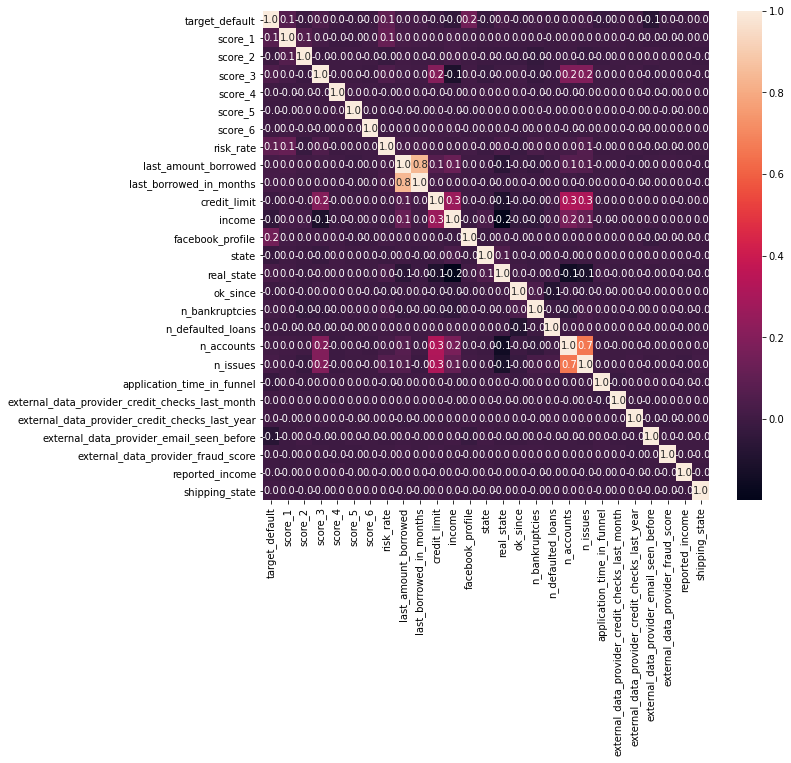

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 9))
sns.heatmap(data.corr(), annot=True,fmt=".1f" )

In [ ]:
!pip install catboost